# 
# MILESTONE 7: SIMPLE LINEAR REGRESSION (MANUAL COMPUTATION)
# STA 2101: Statistics & Probability
Sajib Chowdhury 

ID : 242014141

Objective: Calculate the parameters of the best-fit line (β0 and β1) and the

correlation coefficient (r) using manual calculation methods.




--- Dataset Loaded Successfully ---
             Timestamp Your Academic Stage  Peer pressure  \
0  24/07/2025 22:05:39       undergraduate              4   
1  24/07/2025 22:05:52       undergraduate              3   
2  24/07/2025 22:06:39       undergraduate              1   
3  24/07/2025 22:06:45       undergraduate              3   
4  24/07/2025 22:08:06       undergraduate              3   

   Academic pressure from your home Study Environment  \
0                                 5             Noisy   
1                                 4          Peaceful   
2                                 1          Peaceful   
3                                 2          Peaceful   
4                                 3          Peaceful   

          What coping strategy you use as a student?  \
0  Analyze the situation and handle it with intel...   
1  Analyze the situation and handle it with intel...   
2                   Social support (friends, family)   
3  Analyze the situation and 

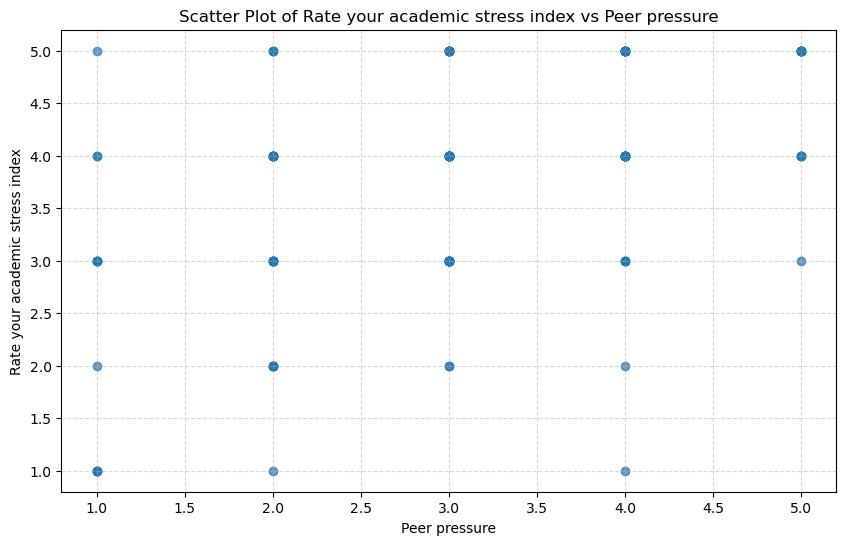


--- Task 2: Regression Parameters ---
Slope (β1): 0.4519
Intercept (β0): 2.3335
Regression Equation: Ŷ = 2.3335 + 0.4519X


 TASK 3: REGRESSION LINE VISUALIZATION


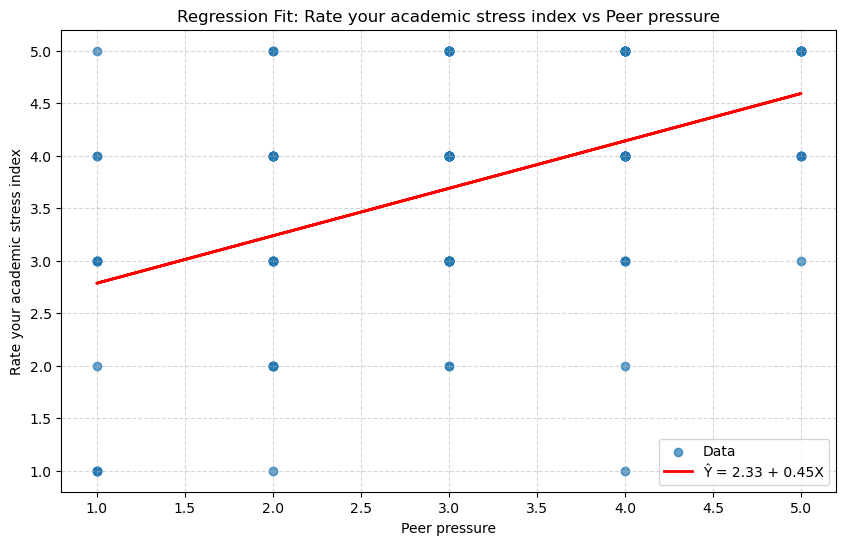


--- Task 4: Model Strength ---
Pearson Correlation (r): 0.4744
Coefficient of Determination (R²): 0.2251

--- OPTIONAL: Verification with scikit-learn ---
Manual β1: 0.4519 | SKL β1: 0.4519
Manual β0: 2.3335 | SKL β0: 2.3335
Manual R²: 0.2251 | SKL R²: 0.2251


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- LOAD YOUR ACTUAL DATASET ---
df = pd.read_csv("academic Stress level -Dataset.csv")

# --- CLEAN: strip whitespace from column names so we can index safely ---
df.columns = df.columns.str.strip()

print("\n--- Dataset Loaded Successfully ---")
print(df.head(), "\n")

# Example guess:
#   Study Hours → X
#   Stress Level → Y
# For this dataset we will use:
#   'Peer pressure' as X
#   'Rate your academic stress index' as Y

X = df['Peer pressure']                   # corrected column name
Y = df['Rate your academic stress index'] # corrected column name (whitespace removed by .str.strip())

print("--- Task 1: Data Selection ---")
print(f"Independent Variable (X): {X.name}")
print(f"Dependent Variable (Y): {Y.name}\n")

# -----------------------------------------------------------
# SUMMARY STATISTICS
# -----------------------------------------------------------

X_mean = X.mean()
Y_mean = Y.mean()
X_var = X.var(ddof=1)
Y_var = Y.var(ddof=1)

print(f"Mean of X ({X.name}): {X_mean:.2f}")
print(f"Mean of Y ({Y.name}): {Y_mean:.2f}")
print(f"Variance of X: {X_var:.2f}")
print(f"Variance of Y: {Y_var:.2f}")

# SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7)
plt.title(f"Scatter Plot of {Y.name} vs {X.name}")
plt.xlabel(X.name)
plt.ylabel(Y.name)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# -----------------------------------------------------------
# TASK 2: MANUAL CALCULATION OF β1 AND β0
# -----------------------------------------------------------

X_dev = X - X_mean
Y_dev = Y - Y_mean

numerator_b1 = (X_dev * Y_dev).sum()
denominator_b1 = (X_dev ** 2).sum()

beta_1 = numerator_b1 / denominator_b1
beta_0 = Y_mean - beta_1 * X_mean

print("\n--- Task 2: Regression Parameters ---")
print(f"Slope (β1): {beta_1:.4f}")
print(f"Intercept (β0): {beta_0:.4f}")
print(f"Regression Equation: Ŷ = {beta_0:.4f} + {beta_1:.4f}X")

# -----------------------------------------------------------
# TASK 3: REGRESSION LINE VISUALIZATION
# -----------------------------------------------------------
print("\n\n TASK 3: REGRESSION LINE VISUALIZATION")

Y_pred = beta_0 + beta_1 * X

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label="Data", alpha=0.7)
plt.plot(X, Y_pred, color="red", linewidth=2,
         label=f"Ŷ = {beta_0:.2f} + {beta_1:.2f}X")
plt.title(f"Regression Fit: {Y.name} vs {X.name}")
plt.xlabel(X.name)
plt.ylabel(Y.name)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# -----------------------------------------------------------
# TASK 4: CORRELATION & R²
# -----------------------------------------------------------

sum_squared_dev_Y = (Y_dev ** 2).sum()
denominator_r = np.sqrt(denominator_b1 * sum_squared_dev_Y)

r = numerator_b1 / denominator_r
R_squared = r ** 2

print("\n--- Task 4: Model Strength ---")
print(f"Pearson Correlation (r): {r:.4f}")
print(f"Coefficient of Determination (R²): {R_squared:.4f}")

# -----------------------------------------------------------
# OPTIONAL: VERIFICATION USING SKLEARN
# -----------------------------------------------------------

try:
    from sklearn.linear_model import LinearRegression

    print("\n--- OPTIONAL: Verification with scikit-learn ---")

    X_skl = X.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X_skl, Y)

    skl_b0 = model.intercept_
    skl_b1 = model.coef_[0]

    print(f"Manual β1: {beta_1:.4f} | SKL β1: {skl_b1:.4f}")
    print(f"Manual β0: {beta_0:.4f} | SKL β0: {skl_b0:.4f}")
    print(f"Manual R²: {R_squared:.4f} | SKL R²: {model.score(X_skl, Y):.4f}")

except:
    print("scikit-learn not installed. Skipping verification.")




## **Reflection **

In this milestone, I learned how to perform simple linear regression manually using my dataset. I selected academic competition as the independent variable and academic stress index as the dependent variable. After calculating the slope and intercept step by step, I understood how regression actually works behind the formulas.

The scatter plot showed a positive relationship: higher academic competition is associated with higher stress. The correlation (r) and R² confirmed this by showing both the strength of the relationship and how much of the stress variation the model explains.

Finally, comparing the manual results with scikit-learn gave me confidence that my calculations were correct. Overall, this task helped me understand regression interpretation and how a single factor can contribute to academic stress.
